# LOW training and cross validation score: indicates underfitting
 high traning score, low cross validation score: suggests overfitting
 both scores high and converging : suggested  as well fitted model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

In [12]:
#load data set
digits= load_digits()
x, y = digits.data, digits.target


In [13]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [16]:
y.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [17]:
#create a decission tree classifier
model = DecisionTreeClassifier()

In [20]:
#set up the learning curve parameter
cv = ShuffleSplit(n_splits=100, random_state=42)


In [21]:
#generate learning curves
train_size, train_scores,test_scores = learning_curve(
    model, x, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

In [23]:
train_sizes=np.linspace(0.1, 1.0, 10)
train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [24]:
train_scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.

In [33]:
#calculate mean and standard deviation across fold
train_scores_mean= np.mean(train_scores, axis=1)
train_scores_std= np.std(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [34]:
train_scores_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
test_score_mean

array([0.66833333, 0.74611111, 0.78622222, 0.80805556, 0.82705556,
       0.83844444, 0.84344444, 0.85011111, 0.85277778, 0.85772222])

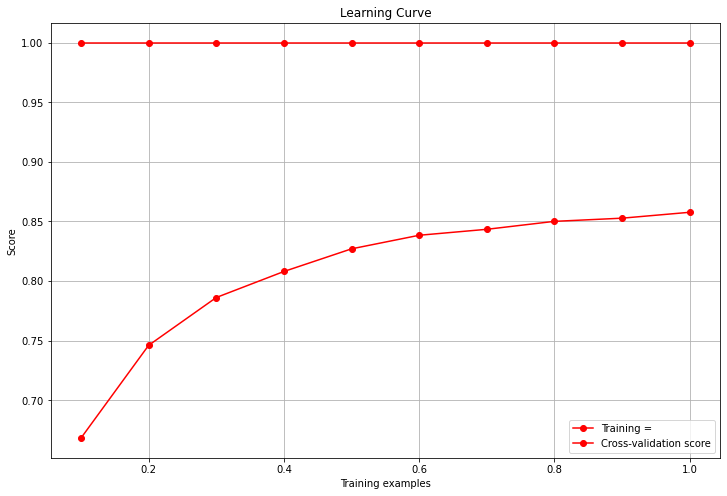

In [39]:
plt.figure(figsize=(12,8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training =")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")

#customize the plot
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()